<a href="https://colab.research.google.com/github/waleedGeorgy/deep-learning/blob/main/TensorFlow_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction and Data Preparation

**Classification** is a supervised machine learning method where the model tries to predict the correct label of a given input data, where the label is qualitative. Classification can be **binary** (where a data point is classified into one of two classes), **multi-class** (where a data point is classified into one of $n$ classes) or **multilabel** classification (where a data point can be classified into multiple classes), and the ultimate goal is to correctly classify each data entry into the correct class using its features.

Example of classification problems: Spam vs. Ham emails (binary classification), animal species (multiclass classification), text tagging (multilabel classification).

In [43]:
import tensorflow as tf

tf.__version__

'2.15.0'

In [44]:
# For starters we'll perform classification on a simple example
# We'll use the make_circles dataset from sklearn
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000, # Generate 1000 datapoints
                    noise = 0.03, # Add variation to data using Gaussian distribution
                    random_state = 42)

X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

As we can see the features X here are the coordinates of the datapoints and the label y is the class of the datapoints (either 0 or 1), hence this is a binary classification problem.

The goal is, using the existing data, we want to train a model that will be able to accurately classify new data points into either class 0 or class 1.

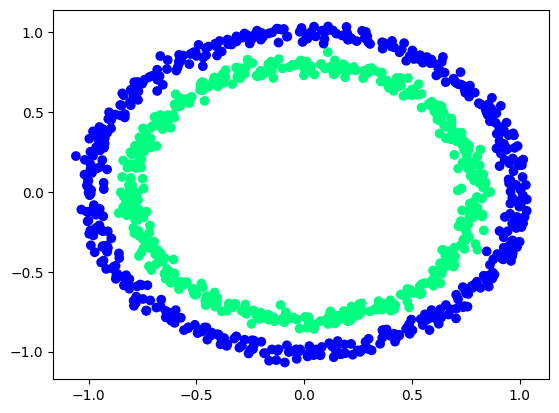

In [45]:
# Following the guidlines of model evaluation, let's first plot the data to get a general sense of what are we working with
import matplotlib.pyplot as plt
plt.scatter(X[:,0], # The x-axis will contain the x coordinates of all the data points
            X[:,1], # The y-axis will contain the y coordinates of all the data points
            c = y, # Coloring data points based off their label y
            cmap = 'winter'); # The color palette

By looking at the plot, our goal is to build a model that can accurately seperate the green dots (class 1) from the blue ones (class 0).

In [46]:
# Checking the data to determine the input and output shapes
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [47]:
X.shape, y.shape

((1000, 2), (1000,))

In [48]:
X[0].shape, y[0].shape

((2,), ())

The model we're going to build will take the coordinates of a data point, and using them, try to classify it into either class 0 or class 1.
The input shape for the model is (2,1), while the output is a scalar (1)

#Building a Basic TensorFlow Classification Model

Now that we have our data ready, we'll start to build the first classification model.

For starters, we'll build a very basic classification model consisting of one dense layer with 1 neuron, and fit for 10 epochs.

**Note:** as with any other machine learning problem, we must perform cross-validation, but since we're working with a toy dataset we did not split the data.

As with the case of regression problems, we need some way to quantify how wrong our classification model is during the fitting phase.

Classification has it own set of loss functions. The most common of them are:

1.   **Cross Entropy Loss / Log loss** - This is the most common loss function used in classification problems. The cross-entropy loss decreases as the predicted probability converges to the actual label. It measures the performance of a classification model whose predicted output is a probability value between 0 and 1. When the classification problem is binary, `.BinaryCrossentropy()` entropy is used:
$logloss=-\frac{1}{N} \sum_{i=1}^N\left(y_i \cdot \log \left(\hat{y}_i\right)+\left(1-y_i\right) \cdot \log \left(1-\hat{y}_i\right)\right)$

  and for multiclass classification `.CategoricalCrossEntropy()` is used:
$logloss=-\frac{1}{N} \sum_{i=1}^N y_i \cdot \log \left(\hat{y}_i\right)$

2.   **Hinge Loss** - The second most common loss function used for classification problems and an alternative to the cross-entropy loss function is hinge loss, primarily developed for support vector machine (SVM) model evaluation. Can be accessed through `.Hinge()`
$hingeloss=\max (0,1-y * f(x))$

In [49]:
# the most basic model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']) # Accuracy will be used as a metric, classification evaluation metrics will be discussed later

model_1.fit(X, y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 5.9987 - accuracy: 0.4900
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 5.9930 - accuracy: 0.4900
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 5.9891 - accuracy: 0.4900
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 5.9784 - accuracy: 0.4900
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 5.9638 - accuracy: 0.4890
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 5.9610 - accuracy: 0.4890
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 5.9592 - accuracy: 0.4900
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 5.9501 - accuracy: 0.4890
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 5.9146 - accuracy: 0.4850
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 5.9025 - accuracy: 0.4850


Even with such a small model we achieved an accuracy of 48.5%, but alas this is not a good result, because since we are working with binary classification problem, with a ~50% accuracy the model is simply guessing to which class should a datapoint belong.

Since the results are unsatisfactory, we'll try to improve our model by following the model improvement guidelines and add more hidden layers and more neurons in each hidden layer, and/or train for longer.

In [50]:
# An improved model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), # New hidden layer with 10 units
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_2.fit(X, y, epochs = 100) # training for 100 epochs instead of 10

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7567 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5963 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0254 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3953 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3649 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3594 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3466 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3422 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3196 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3127 - accuracy: 0.4720
Epoch 11/

No improvement at all, and the model still is classifying data randomly.

#Introducing Non-Linearity

So what could be the problem with the previous models? They consist of only linear dense layers $y = mX + p$, and the question is, are straight lines (linear decision boundaries) enough to seperate the two circular clusters of datapoints we're working with? The answer is no.

For cases like these, **non-linearity** must be implemented.

The **non-linearity** property means that we're modeling a complex, non-linear relationship between features and labels, and in deep learning it can be introduced through the **activation functions**.

Non-linearity is a **very important concept**, since almost every real-world neural networks can't functions without it, simply due to the fact the most of the times the relationship between data is not linear.

**Activation functions** in deep learning are functions that change the behaviour of the outputs of the hidden layers (the sum of the weighted input data of the neuron + bias of the neuron) and add a non-linear property to them. Some examples of non-linear activation functions: ReLU (Recitfied Linear Unit), Sigmoid, Tanh (Hyperbolic Tangent), Softmax, etc...

In [58]:
# Creating a model with non-linear activation functions
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'), # added a ReLU activation function to the hidden layer
    tf.keras.layers.Dense(5, activation = 'relu'), # added another layer with ReLU activation function
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

Strangely enough, even with non-linearity, our model still operates by guessing. What else could be missing?

If we look at our output layer, it is only outputting a single value that is supposed to represent the class of the datapoint, but what does the model actually outputs? Let's check out by predicting on the very first datapoint from the dataset.

In [59]:
# using model_3 to predict the class of the first datapoint
model_3.predict(tf.expand_dims([0.75424625, 0.23148074], axis = 0))

1/1 [==============================] - 0s 100ms/step


array([[-0.08785159]], dtype=float32)

We get an output of -0.08. What does it represent in the context of belonging to a class? The answer is nothing, becuase the model outputs a raw logit (raw model outputs) that does not represent anything. So how do we modify our classification model so that it ouputs a value that can be interpreted? The answer is **activation functions** again.

Output layers need their own activation functions to output interpretable result, and without them neither the model can be trained (since the loss functions need to quantify how wrong our model is using said interpretable outputs, in order for the model to be effectively trained with the chosen optimizer), nor the user can get any information from the model.

In binary classification, in order to turn output logits into prediction probabilities, we use the `sigmoid` activation function. As for multiclass classification we typically use the `softmax` activation function.

Using a suitable activation function for the ouput layer for any kind of application is of utmost importance and is the standard practice regarding any neural network.

In [66]:
# Creating a model with non-linear activation functions
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # added a sigmoid activation function on the output layer
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5150
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5070
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5020
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5080
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5220
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5260
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5160
Epoch 11/

And just like that we managed to train a perfect model with **100% accuracy** with a very small loss of 0.03!

In [67]:
# Using the model we've got, let's predict the class of the very first datpoint from the dataset
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [68]:
print(model_4.predict(tf.expand_dims([0.75424625, 0.23148074], axis = 0)))
print(tf.math.round(model_4.predict(tf.expand_dims([0.75424625, 0.23148074], axis = 0))))

1/1 [==============================] - 0s 69ms/step
[[0.9885231]]
1/1 [==============================] - 0s 22ms/step
tf.Tensor([[1.]], shape=(1, 1), dtype=float32)


Our model is 98.8% sure that the datapoint we predicted on belongs to class 1 which is correct!

To recap:

*   **Output Logits** - raw model outputs. Uninterpretable to neither the model nor the human.
*   **Prediction Probabilities** - The probability of belonging to a class in a classification problem. Obtained through using activation functions on output layers.
* **Prediction Labels** - The actual predicted class of the input. In binary classification we **round** the probability with a default threshold of 50% (an output with probability > 50% will belong to class 1, while any output with a probability < 50% will belong to class 0, this is why the above point was predicted to belong to class 1).

  for multiclass classification the index of the ouput with the highest probabily represents the class that an input belongs to. Can be obtained using `argmax` (e.g. the softmaxed output is [0.2, 0.35, 0.45], by applying argmax we get that the highest probability is at index 2, which means that the current datapoint belongs to class 2).



Text(0.5, 0, 'Epochs')

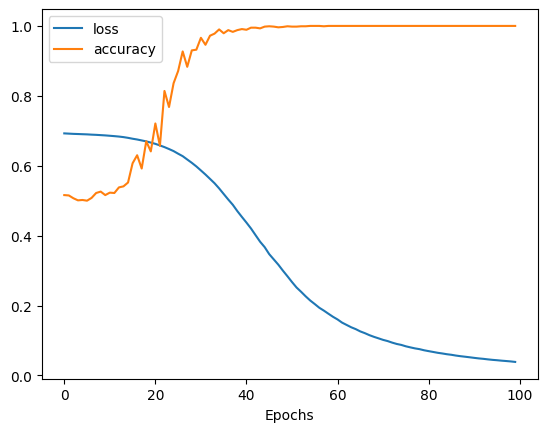

In [72]:
# Plotting model's loss and accuracy
import pandas as pd

pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')

As with the case of regression problems, there exists a wide range of evaluation metrics for classification models. Some of them are:

1.   **Confusion Matrix** - plots the true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN) of the model.
2.   **Classification Report** - contains the accuracy, precision, recall, f1-score of our model.
  *   **Accuracy** shows how often the model is correct overall. $accuracy=\frac{T P+T N}{T P+T N+F P+F N}$
  *   **Precision** is a metric that measures how often a machine learning model correctly predicts the positive class. Precision answers the question: how often the positive predictions are correct?
 $precision=\frac{{TP}}{{TP + FP}}$
  * **Recall (Sensitivity)** is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. Recall answers the question: can the model find all instances of the positive class? $recall=\frac{{TP}}{{TP + FN}}$
  * **f1-score** is an important metric that calculates the harmonic mean of recall and precision. Since there is always a trade-off between the two, maximizing the f1-score, means maximizing both of these metrics.


3. **ROC Curve and AUC** - **ROC Curve** (Receiver Operator Characteristics Curve) plots the rate of true positives (TPR) against the rate of false positives (FPR) of a classification model and shows the performance of a said model at all classification thresholds. **AUC** (Area Under the Curve) measures the entire two-dimensional area underneath the entire ROC curve. The AUC calculates the area that is under the ROC curve, the bigger the area the better the model is. It can be used to compare the performance of different models for predicting the same outcome.



In [ ]:
|